In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd

#Load the datasets and Create an ExcelFile object
from google.colab import drive
drive.mount('/content/drive')
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ChainCleaned.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Initial check
print(Data.head(5))
print('\n')
print(Data.dtypes)
print('\n')
print(Data.info())

   CustomerCode  SellerCode  ProductCode                        CustomerName  \
0     1010105.0   1400092.0    1101002.0  فروشگاه زنجيره اي ديان گسترپارسيان   
1     1010288.0   1400059.0    1102004.0              فروشگاه زنجيره اي رفاه   
2     1010288.0   1400059.0    1101006.0              فروشگاه زنجيره اي رفاه   
3     1010288.0   1400059.0    1102002.0              فروشگاه زنجيره اي رفاه   
4     1010238.0   1400059.0    1102001.0              فروشگاه زنجيره اي رفاه   

                                          StoreName  \
0                         فروشگاه ديان گستر پارسيان   
1  فروشگاه رفاه تهران- شمال- وزارت کشور(فاطمي)27111   
2  فروشگاه رفاه تهران- شمال- وزارت کشور(فاطمي)27111   
3  فروشگاه رفاه تهران- شمال- وزارت کشور(فاطمي)27111   
4          فروشگاه رفاه تهران- جنوب- نازي آباد28131   

                     SellerName  \
0                 مهدي عطايي فر   
1  فروشنده فروشگاههاي زنجيره اي   
2  فروشنده فروشگاههاي زنجيره اي   
3  فروشنده فروشگاههاي زنجيره اي   
4  فروشنده فر

In [ ]:
#Seasonal Sales Analysis

import seaborn as sns
import matplotlib.pyplot as plt

#Define seasons based on MonthNumeric
def AssignSeason(month):
  if month in [1, 2, 3]:
    return 'Season 1 (Spring)'
  if month in [4, 5, 6]:
    return 'Season 2 (Summer)'
  if month in [7, 8, 9]:
    return 'Season 3 (Autumn)'
  if month in [10, 11, 12]:
    return 'Season 4 (Winter)'
  else:
    return 'Unknown'

#Apply the function to create a new column
Data['Season'] = Data['MonthNumeric'].apply(AssignSeason)

#Group by Season and calculate total sales
SeasonalSales = Data.groupby('Season')['NetSales'].sum().reset_index()
SeasonalSales = SeasonalSales.sort_values(by='NetSales', ascending=False)
SeasonalSales["NetSales"] = SeasonalSales["NetSales"].apply(lambda x: f"{x:,}")

print(SeasonalSales)

              Season           NetSales
2  Season 3 (Autumn)  3,377,722,361,386
3  Season 4 (Winter)  2,960,842,269,717
1  Season 2 (Summer)  2,569,596,457,486
0  Season 1 (Spring)  1,316,267,228,898


([0, 1, 2, 3],
 [Text(0, 0, 'Season 3 (Autumn)'),
  Text(1, 0, 'Season 4 (Winter)'),
  Text(2, 0, 'Season 2 (Summer)'),
  Text(3, 0, 'Season 1 (Spring)')])

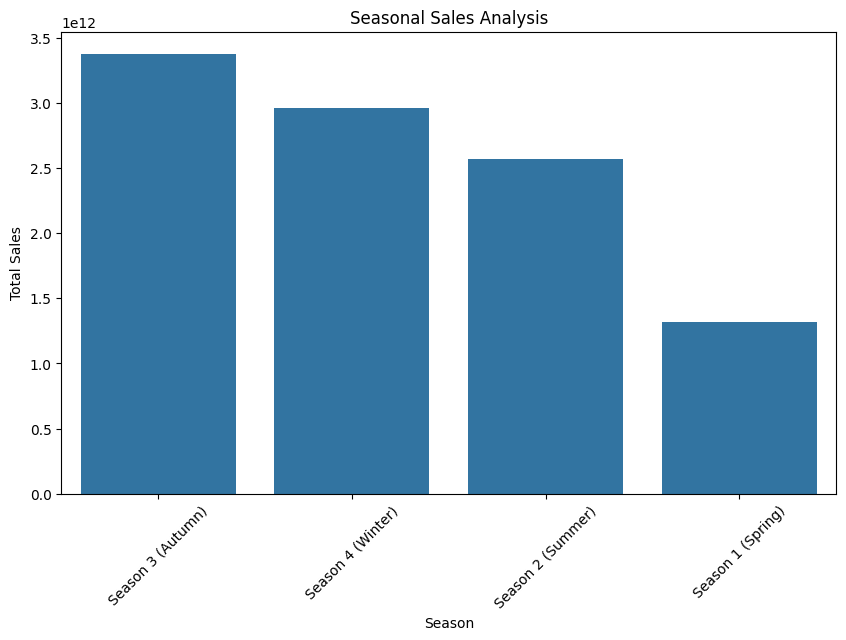

In [ ]:
#Group by Season and calculate total sales
SeasonalSales = Data.groupby('Season')['NetSales'].sum().reset_index()
SeasonalSales = SeasonalSales.sort_values(by='NetSales', ascending=False)

#Plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Season', y='NetSales', data=SeasonalSales)
plt.title('Seasonal Sales Analysis')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

In [ ]:
#Monthly Sales Analysis

MonthlySales = Data.groupby('MonthNumeric')['NetSales'].sum().reset_index()
MonthlySales = MonthlySales.sort_values(by='NetSales', ascending=False)
MonthlySales['NetSales'] = MonthlySales['NetSales'].apply(lambda x: f"{x:,}")

print(MonthlySales)

    MonthNumeric           NetSales
6              7  1,229,999,699,046
7              8  1,100,007,539,838
11            12  1,079,191,875,733
9             10  1,058,137,274,333
8              9  1,047,715,122,502
4              5  1,009,915,297,363
5              6    828,749,295,141
10            11    823,513,119,651
3              4    730,931,864,982
2              3    516,880,829,104
1              2    451,711,380,000
0              1    347,675,019,794


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '12'),
  Text(3, 0, '10'),
  Text(4, 0, '9'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '11'),
  Text(8, 0, '4'),
  Text(9, 0, '3'),
  Text(10, 0, '2'),
  Text(11, 0, '1')])

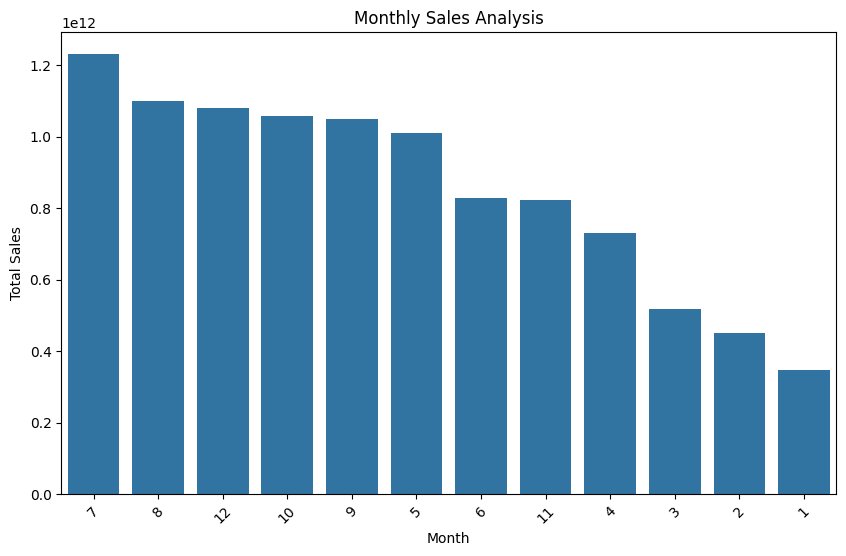

In [ ]:
#Monthly Sales Analysis

MonthlySales = Data.groupby('MonthNumeric')['NetSales'].sum().reset_index()
MonthlySales = MonthlySales.sort_values(by='NetSales', ascending=False)

#Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='MonthNumeric', y='NetSales', data=MonthlySales, order=MonthlySales["MonthNumeric"])
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

<ipython-input-7-16d43eb13e69>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(Data, x="MonthNumeric", y="NetSales", hue="Year", estimator="sum", ci=None, marker="o")


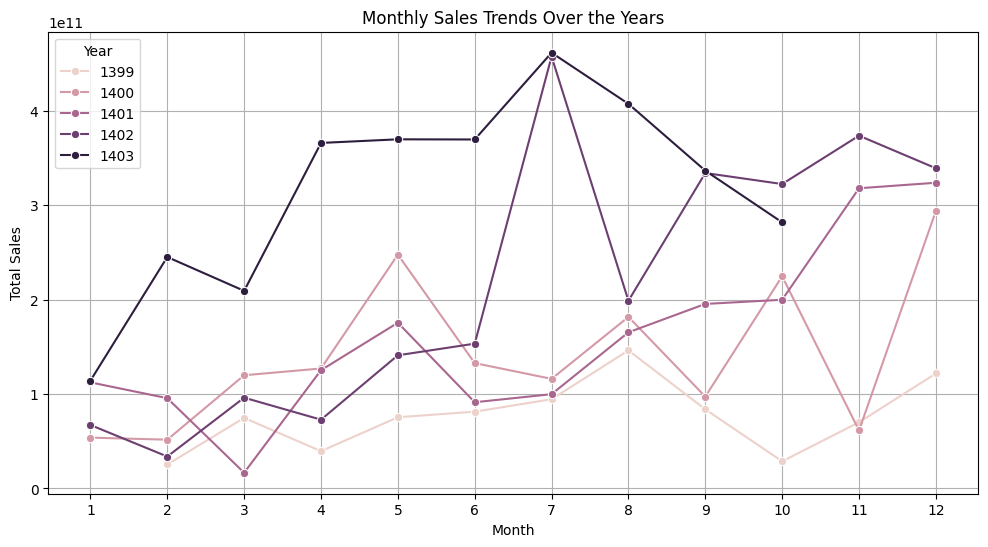

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(Data, x="MonthNumeric", y="NetSales", hue="Year", estimator="sum", ci=None, marker="o")
plt.title("Monthly Sales Trends Over the Years")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))  # Ensure x-axis has correct months
plt.legend(title="Year")
plt.grid(True)
plt.show()

<ipython-input-8-72abe1605bcb>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=SeasonalSales, x="Season", y="NetSales", hue="Year", estimator="sum", ci=None)


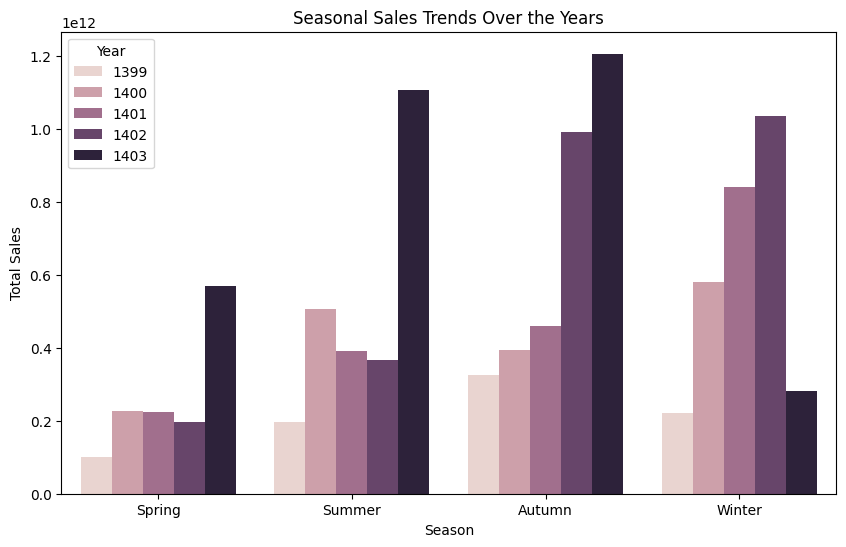

In [ ]:
SeasonalSales = Data.groupby(['Year', 'MonthNumeric'])['NetSales'].sum().reset_index()
SeasonalSales["Season"] = SeasonalSales["MonthNumeric"].apply(lambda x:
    "Spring" if x in [1, 2, 3] else
    "Summer" if x in [4, 5, 6] else
    "Autumn" if x in [7, 8, 9] else
    "Winter"
)

plt.figure(figsize=(10, 6))
sns.barplot(data=SeasonalSales, x="Season", y="NetSales", hue="Year", estimator="sum", ci=None)
plt.title("Seasonal Sales Trends Over the Years")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.show()

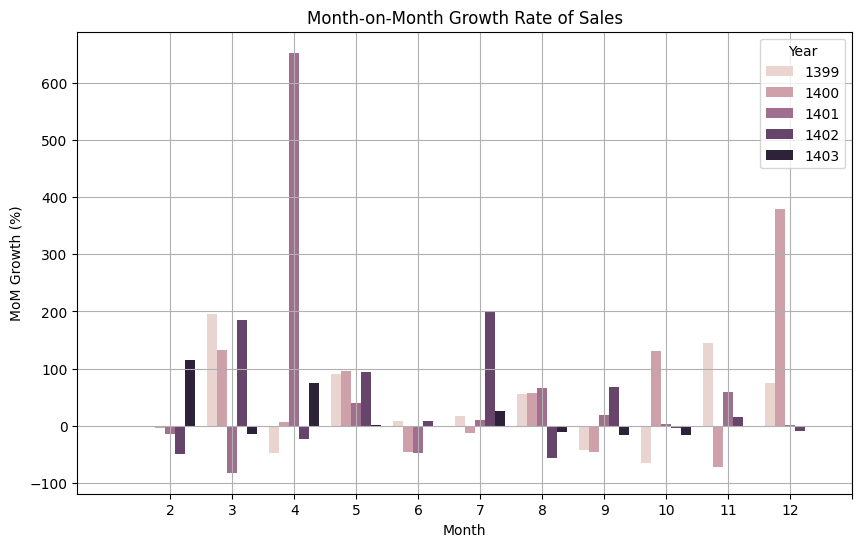

In [ ]:
#Month-on-Month Growth Rate

# Calculate total monthly sales for each year
MonthlySales = Data.groupby(['Year', 'MonthNumeric'])['NetSales'].sum().reset_index()

# Calculate MoM Growth
MonthlySales['MoM Growth'] = MonthlySales.groupby('Year')['NetSales'].pct_change() * 100

plt.figure(figsize=(10, 6))
# Remove the 'marker' argument
sns.barplot(data=MonthlySales, x='MonthNumeric', y='MoM Growth', hue='Year')
plt.title('Month-on-Month Growth Rate of Sales')
plt.xlabel('Month')
plt.ylabel('MoM Growth (%)')
plt.xticks(range(1, 13))
plt.legend(title="Year")
plt.grid(True)
plt.show()

<ipython-input-10-9a795b19cd77>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ProductSeasonalSales, x="Season", y="NetSales", hue="ProductGroup", estimator="sum", ci=None)


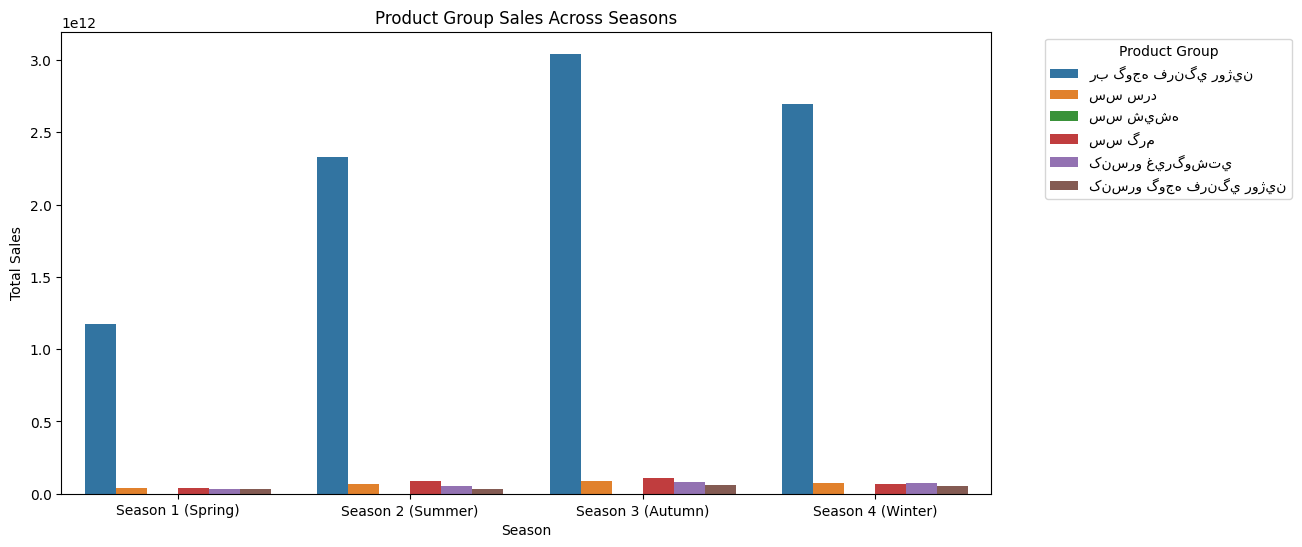

In [ ]:
#Check Seasonal Sales by Product Group

ProductSeasonalSales = Data.groupby(["ProductGroup", "Season"])["NetSales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=ProductSeasonalSales, x="Season", y="NetSales", hue="ProductGroup", estimator="sum", ci=None)
plt.title("Product Group Sales Across Seasons")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.legend(title="Product Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


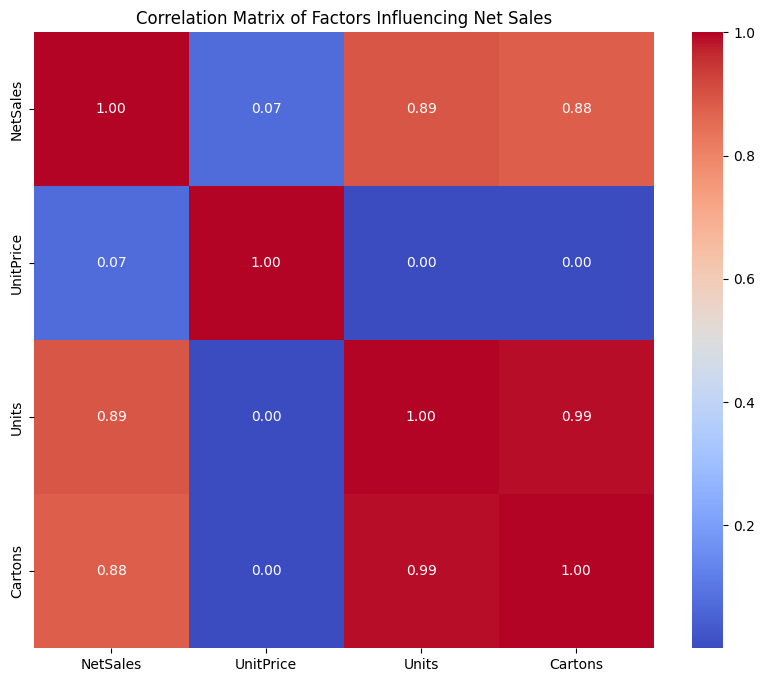

In [ ]:
#Correlation Analysis: Factors Influencing Net Sales

CorrColumns = ['NetSales', 'UnitPrice', 'Units', 'Cartons']
CorrMatrix = Data[CorrColumns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(CorrMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Factors Influencing Net Sales")
plt.show()

In [ ]:
!pip install pmdarima

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3021.805, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3009.150, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3003.636, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3019.928, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3004.424, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3004.038, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3005.631, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3005.117, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=3020.730, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3004.944, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=3008.934, Time=0.24 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3009.111, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=3004.783, Time=0.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12]             : AIC=3002.693, Time=1.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[12]             : AIC=3003.326, Time=0.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=3004.691, Time=2.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12]             : AIC=3004.692, Time=1.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12]             : AIC=3002.731, Time=0.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12]             : AIC=3006.588, Time=2.45 sec
 ARIMA(0,1,0)(0,0,1)[12]             : AIC=3022.864, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=3003.866, Time=0.51 sec
 ARIMA(0,1,2)(0,0,1)[12]             : AIC=3005.023, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12]             : AIC=3007.347, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12]             : AIC=3005.340, Time=0.61 sec

Best model:  ARIMA(0,1,1)(0,0,1)[12]          
Total fit time: 18.800 seconds


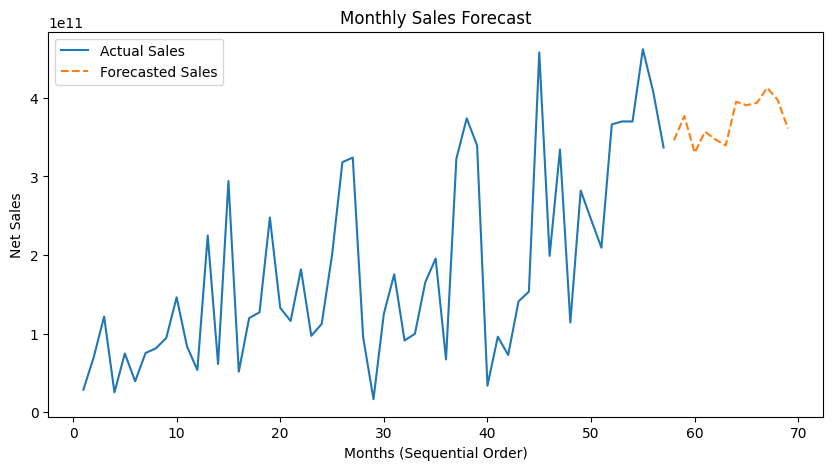


Forecasted Sales for the Next 12 Months:
Month 58: 345,947,493,302.37
Month 59: 376,807,924,417.15
Month 60: 330,148,540,086.99
Month 61: 356,853,546,663.31
Month 62: 346,990,653,979.65
Month 63: 339,422,153,439.01
Month 64: 394,952,147,529.89
Month 65: 390,565,818,710.38
Month 66: 393,612,741,366.06
Month 67: 412,675,009,253.51
Month 68: 397,503,367,165.84
Month 69: 361,032,888,757.37


In [ ]:
#Monthly Sales Forecast

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Aggregate sales by Year-Month
monthly_sales = Data.groupby("YearMonth")["NetSales"].sum()

#Keep the index as numeric for time series modeling
monthly_sales.index = range(1, len(monthly_sales) + 1)  # Ensuring a sequential index

#Auto-select best ARIMA model
model = pm.auto_arima(monthly_sales, seasonal=True, m=12, trace=True)

#Train and Forecast
model_fit = ARIMA(monthly_sales, order=model.order, seasonal_order=model.seasonal_order).fit()
forecast = model_fit.forecast(steps=12)

#Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label="Actual Sales")
plt.plot(range(len(monthly_sales) + 1, len(monthly_sales) + 13), forecast, label="Forecasted Sales", linestyle="dashed")
plt.legend()
plt.title("Monthly Sales Forecast")
plt.xlabel("Months (Sequential Order)")
plt.ylabel("Net Sales")
plt.show()


#Print Forecasted Sales
print("\nForecasted Sales for the Next 12 Months:")
for i, value in enumerate(forecast, start=len(monthly_sales) + 1):
    print(f"Month {i}: {value:,.2f}")  # Formats with commas for readability

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1332.437, Time=1.71 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1332.884, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1331.951, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1332.126, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1422.390, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1330.782, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1330.599, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1332.401, Time=0.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1331.769, Time=0.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1333.764, Time=3.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1333.419, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1331.369, Time=1.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1332.208, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1332.945, Time=0.32 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=1348.479, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,1)[12] intercept
Total fit time: 10.006 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Forecasted Cartons for the Next 12 Months:
Month 58: 48,079 cartons
Month 59: 56,963 cartons
Month 60: 49,314 cartons
Month 61: 52,028 cartons
Month 62: 53,736 cartons
Month 63: 52,321 cartons
Month 64: 62,382 cartons
Month 65: 60,263 cartons
Month 66: 59,470 cartons
Month 67: 61,064 cartons
Month 68: 57,865 cartons
Month 69: 52,133 cartons


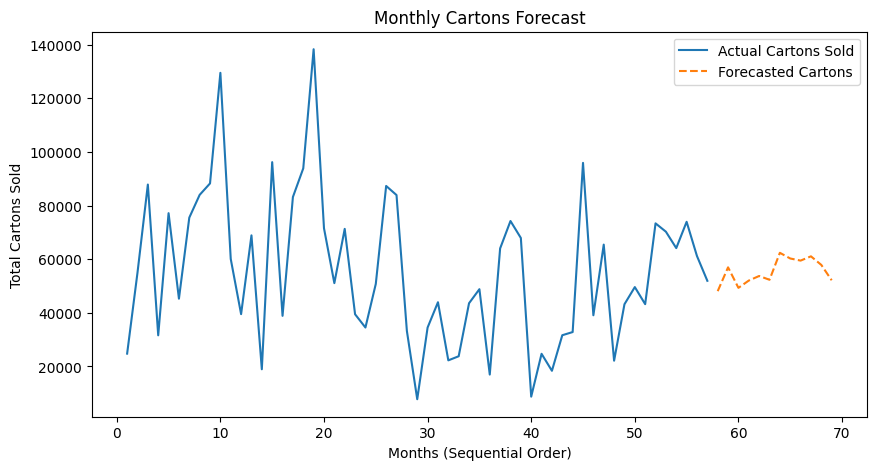

In [ ]:
#Month Cartons Forecast

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Aggregate total cartons per month
monthly_cartons = Data.groupby("YearMonth")["Cartons"].sum()

#Keep the index as numeric for time series modeling
monthly_cartons.index = range(1, len(monthly_cartons) + 1)  # Ensuring a sequential index

#Auto-select best ARIMA model
model = pm.auto_arima(monthly_cartons, seasonal=True, m=12, trace=True)

#Train and Forecast
model_fit = ARIMA(monthly_cartons, order=model.order, seasonal_order=model.seasonal_order).fit()
forecast = model_fit.forecast(steps=12)

#Print Forecasted Cartons
print("\nForecasted Cartons for the Next 12 Months:")
for i, value in enumerate(forecast, start=len(monthly_cartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")  # Formats output with commas and no decimals

#Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_cartons, label="Actual Cartons Sold")
plt.plot(range(len(monthly_cartons) + 1, len(monthly_cartons) + 13), forecast, label="Forecasted Cartons", linestyle="dashed")
plt.legend()
plt.title("Monthly Cartons Forecast")
plt.xlabel("Months (Sequential Order)")
plt.ylabel("Total Cartons Sold")
plt.show()

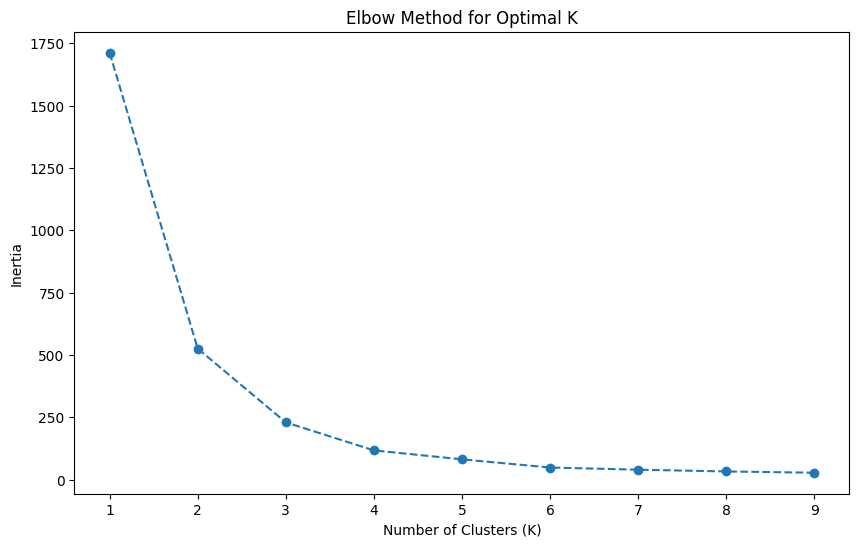

In [ ]:
#Customer Segmentation Based on Purchasing Patterns

#Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Selecting customer data related
CustomerData = Data.groupby('CustomerCode')[['NetSales', 'Units']].sum().reset_index()

#Normalise data
Scaler= StandardScaler()
ScaledData = Scaler.fit_transform(CustomerData[['NetSales', 'Units']])

#Determine the optimal clusters (elbow method)
Optimal = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(ScaledData)
  Optimal.append(kmeans.inertia_)

#Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1,10), Optimal, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

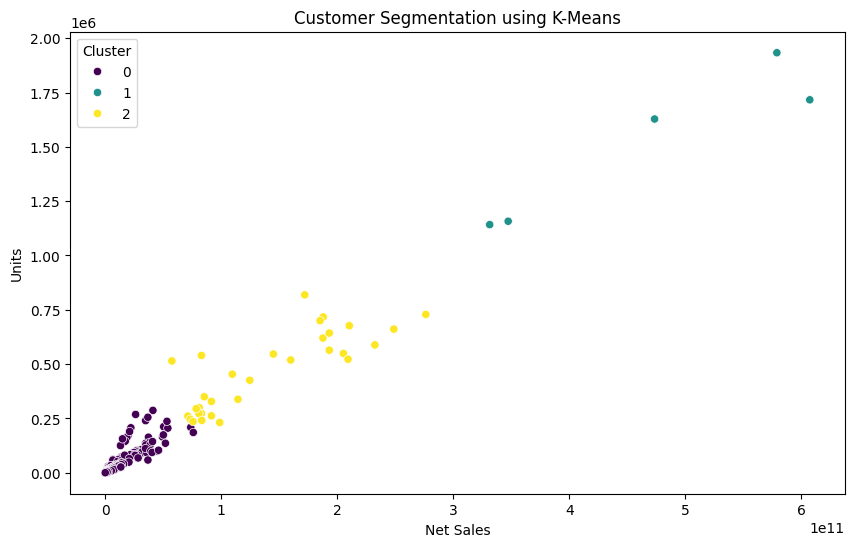

In [ ]:
#Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
CustomerData['Cluster'] = kmeans.fit_predict(ScaledData)

#Visualise clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=CustomerData, x='NetSales', y='Units', hue='Cluster', palette='viridis') # Changed 'paletter' to 'palette'
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Net Sales')
plt.ylabel('Units')
plt.show()

In [ ]:
#Cluster Evaluation Metrics

#Silhouette Score (Higher = Better Clustering)
from sklearn.metrics import silhouette_score
SilhouetteScore = silhouette_score(ScaledData, CustomerData['Cluster'])
print(f'Silhouette Score: {SilhouetteScore}')

#Davies-Bouldin Index (Lower = Better Clustering)
from sklearn.metrics import davies_bouldin_score
DBIndex = davies_bouldin_score(ScaledData, CustomerData['Cluster'])
print(f'Davies-Bouldin Index: {DBIndex}')

#Calinski-Harabasz Index (Higher = Better Clustering)
from sklearn.metrics import calinski_harabasz_score
CHIndex = calinski_harabasz_score(ScaledData, CustomerData['Cluster'])
print(f'Calinski-Harabasz Index: {CHIndex}')

Silhouette Score: 0.9170935666385058
Davies-Bouldin Index: 0.4621886463450455
Calinski-Harabasz Index: 2752.132098927263


   Cluster               NetSales               Units
0        0   4,385,555,391.353659  16,789.88048780488
1        1      467,790,105,678.2         1,515,652.4
2        2  138,365,237,683.41934  465,201.8387096774


   Cluster  Count
0        0    820
1        2     31
2        1      5


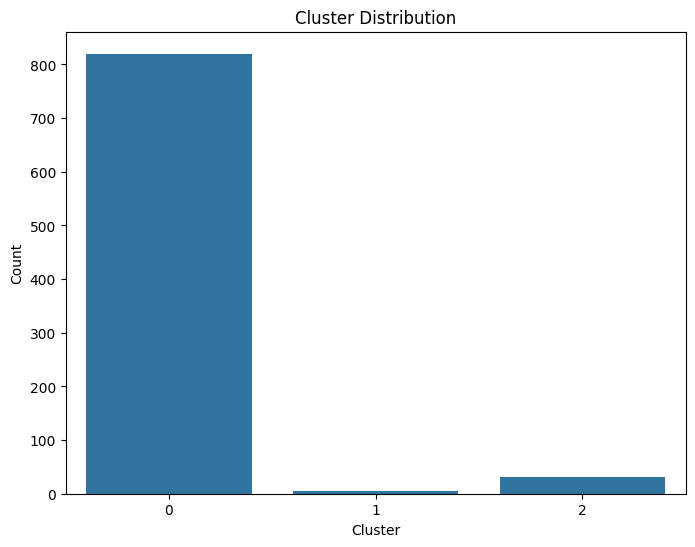

In [ ]:
#Check Cluster Summary Statistics

ClusterSummary = CustomerData.groupby('Cluster')[['NetSales', 'Units']].mean().reset_index()
ClusterSummary["NetSales"] = ClusterSummary["NetSales"].apply(lambda x: f"{x:,}")
ClusterSummary["Units"] = ClusterSummary["Units"].apply(lambda x: f"{x:,}")

print(ClusterSummary)
print('\n')

#Counting the clusters
ClusterCounter = CustomerData['Cluster'].value_counts().reset_index()
ClusterCounter.columns = ['Cluster', 'Count']
print(ClusterCounter)

#Visualize Cluster Distribution
plt.figure(figsize=(8,6))
sns.barplot(data=ClusterCounter, x='Cluster', y='Count')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
#Customers in clusters

Cluster0Customers = CustomerData[CustomerData['Cluster'] == 0]
Cluster1Customers = CustomerData[CustomerData['Cluster'] == 1]
Cluster2Customers = CustomerData[CustomerData['Cluster'] == 2]

print("Cluster 0 Customers:")
print(Cluster0Customers)
print("\nCluster 1 Customers:")
print(Cluster1Customers)
print("\nCluster 2 Customers:")
print(Cluster2Customers)

Cluster 0 Customers:
     CustomerCode     NetSales   Units  Cluster
0       1010001.0  41100758528  287016        0
4       1010005.0  34792274026  239718        0
5       1010008.0  37223536614  163566        0
7       1010010.0    470861164    1380        0
8       1010011.0  50359261300  212004        0
..            ...          ...     ...      ...
851     1011006.0      6860878       6        0
852     1011007.0     31484970      60        0
853     1011008.0       571740       1        0
854     1011009.0   1560385009    3000        0
855     1011011.0       558039       1        0

[820 rows x 4 columns]

Cluster 1 Customers:
    CustomerCode      NetSales    Units  Cluster
17     1010020.0  473609292013  1628286        1
19     1010022.0  579052664162  1933488        1
21     1010024.0  331457336179  1142100        1
27     1010030.0  607445554985  1716708        1
28     1010031.0  347385681052  1157680        1

Cluster 2 Customers:
     CustomerCode      NetSales   Units  

In [ ]:
cluster_labels = {
    0: "Casual Buyers",
    1: "VIP Customers",
    2: "Bulk Buyers"
}

CustomerData["Segment"] = CustomerData["Cluster"].map(cluster_labels)
print(CustomerData["Segment"])

0      Casual Buyers
1        Bulk Buyers
2        Bulk Buyers
3        Bulk Buyers
4      Casual Buyers
           ...      
851    Casual Buyers
852    Casual Buyers
853    Casual Buyers
854    Casual Buyers
855    Casual Buyers
Name: Segment, Length: 856, dtype: object


In [ ]:
#Top-Selling and Low-Performing Products

#Group sales by product
ProductSales = Data.groupby('ProductCode')['NetSales'].sum().reset_index()

#Sort to get top and low-performing products
TopProducts = ProductSales.sort_values(by='NetSales', ascending=False).head(10)
LowProducts = ProductSales.sort_values(by='NetSales', ascending=True).head(10)

print('Top-Selling Products:')
print(TopProducts)
print('\n')
print('Low-Performing Products:')
print(LowProducts)

Top-Selling Products:
    ProductCode       NetSales
0     1101002.0  7881154873017
3     1101006.0   573921093344
5     1101008.0   307522797326
1     1101004.0   225757845606
2     1101005.0   200245609154
7     1102001.0   136324977748
13    1102023.0   117125385552
23    1103007.0    92959531788
17    1102027.0    81914390680
16    1102026.0    57670683384


Low-Performing Products:
    ProductCode    NetSales
12    1102022.0    84471628
22    1103006.0   126091945
6     1101009.0   411244269
21    1103005.0   608823097
37    1104013.0  4613853118
36    1104012.0  5019412314
35    1104011.0  5332022703
29    1104005.0  6029325962
18    1102028.0  8215749536
28    1104004.0  8762416626


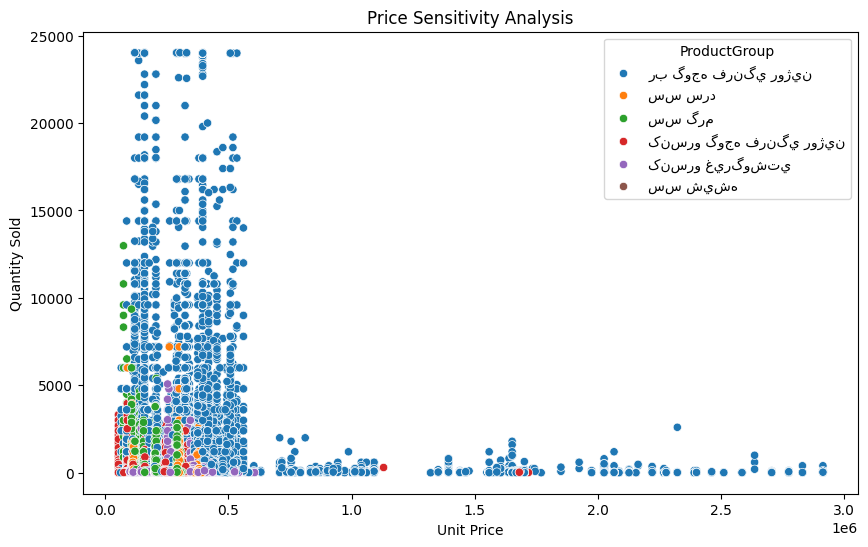

In [ ]:
#Price Sensitivity Analysis

#Scatter plot of price vs quantity sold
plt.figure(figsize=(10,6))
sns.scatterplot(data=Data, x='UnitPrice', y='Units', hue='ProductGroup')
plt.title('Price Sensitivity Analysis')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
#Customer Segmentation by Product Preference (Clustering)

#Select relevant features
CustomerData = Data.groupby('CustomerCode')['ProductGroupCode'].value_counts().unstack(fill_value=0)

#Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
CustomerData['Cluster'] = kmeans.fit_predict(CustomerData)

print(CustomerData.head(30))

ProductGroupCode    0    1  2    3   4   5  Cluster
CustomerCode                                       
1010001.0          73    0  0   51   0  16        2
1010002.0          76    0  0   63   0  24        2
1010003.0         126    0  0   73   0  17        2
1010004.0         144    0  0   83   0  20        2
1010005.0          88    0  0   64   0  18        2
1010008.0         106   48  0   53   4  15        2
1010009.0         192   79  0   78   4  12        2
1010010.0           1    0  0    0   0   1        0
1010011.0          95   53  0   47   2  17        2
1010012.0          98   48  0   41   4  11        2
1010013.0         121   64  0   69   4  17        2
1010014.0          24   12  0   17   0   4        0
1010015.0          55   34  0   38   4   7        0
1010016.0         113   30  0   34   4   8        2
1010017.0         185    0  0   78   0  19        2
1010018.0         156    0  0   89   0  26        2
1010019.0         180    0  0  108   0  38        2
1010020.0   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


12    229673.427296
13    260140.116372
14    259147.908020
15    274220.501019
16    268592.989321
17    280156.686837
18    277027.452190
19    282173.571378
20    280899.878225
21    283947.800128
22    282871.459380
23    284651.877962
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


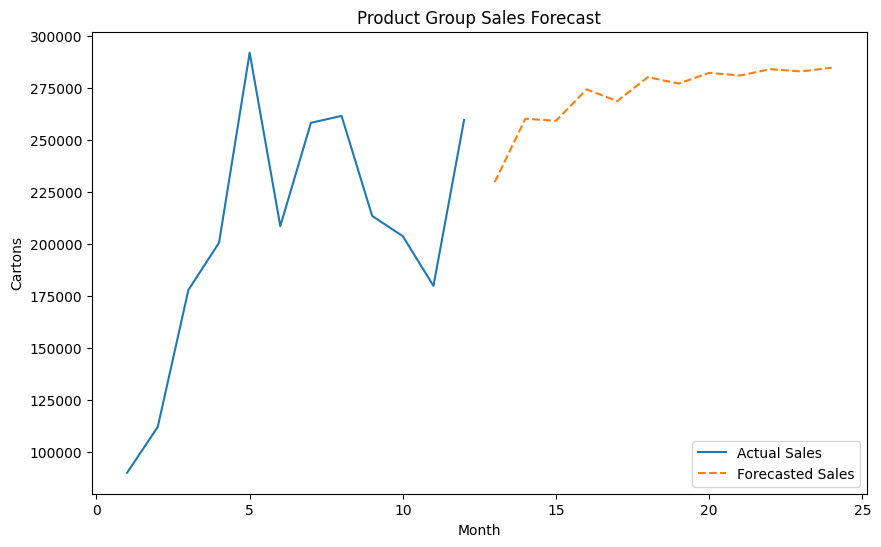

In [ ]:
#Forecasting Future Sales by Product Category

from statsmodels.tsa.arima.model import ARIMA

#Filter data for a single product group
product_sales = Data[Data["ProductGroup"] == "رب گوجه فرنگي روژين"].groupby("MonthNumeric")["Cartons"].sum()

#Fit ARIMA model
model = ARIMA(product_sales, order=(5,1,0))
model_fit = model.fit()

#Forecast next 12 months
forecast = model_fit.forecast(steps=12)
print(forecast)

#plot
plt.figure(figsize=(10, 6))
plt.plot(product_sales, label="Actual Sales")
plt.plot(range(len(product_sales) + 1, len(product_sales) + 13), forecast, label="Forecasted Sales", linestyle="dashed")
plt.title("Product Group Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Cartons")
plt.legend()